<a href="https://colab.research.google.com/github/Gvitagliano/SSN/blob/main/SSN_04_03_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
#Potential as a function of position

# Constantes
k = 8.9875517923e9  # Constante de Coulomb en N·m²/C²
e = 1.602e-19  # Carga elemental en C

epsilon = 1e-9  # Pequeña corrección para evitar división por cero

def getV(x):
    potvalue = -k * e**2 / (np.abs(x) + epsilon)
    return potvalue

#Discretized Schrodinger equation in n points (FROM 0 to n-1)
def Eq(n,h,x):
    F = np.zeros([n,n])
    for i in range(0,n):
        F[i,i] = -2*((h**2)*getV(x[i]) + 1)
        if i > 0:
           F[i,i-1] = 1
           if i < n-1:
              F[i,i+1] = 1
    return F

# Interval for calculating the wave function [-L/2,L/2]
L = 20
xlower = -L/2.0
xupper = L/2.0

#Discretization options
h = 0.02  #discretization in space

#Create coordinates at which the solution will be calculated
x = np.arange(xlower,xupper+h,h)
#grid size (how many discrete points to use in the range [-L/2,L/2])
npoints=len(x)

print("Using",npoints, "grid points.")

#Calculation of discrete form of Schrodinger Equation and diagonalization
F=Eq(npoints,h,x)
eigenValues, eigenVectors = np.linalg.eig(F)

#Order results by eigenvalue
# w ordered eigenvalues and vs ordered eigenvectors
idx = eigenValues.argsort()[::-1]
w = eigenValues[idx]
vs = eigenVectors[:,idx]

#Energy Level
E = - w/(2.0*h**2)

Using 1001 grid points.


n= 0 , E(numeric)=0.0123
n= 1 , E(numeric)=0.0492
n= 2 , E(numeric)=0.1108
n= 3 , E(numeric)=0.1970
n= 4 , E(numeric)=0.3078


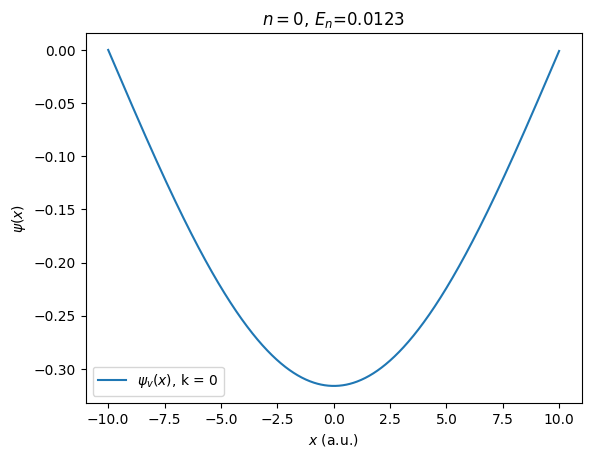

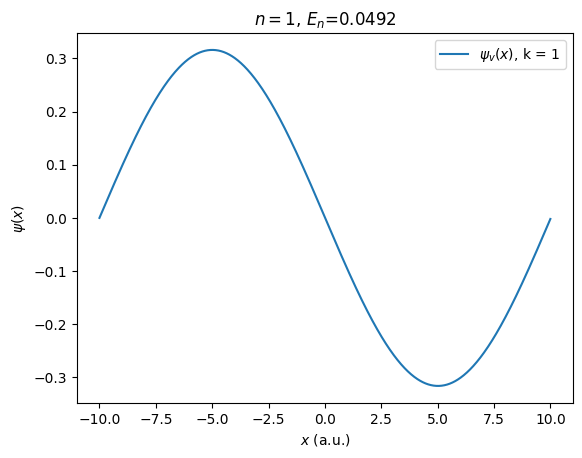

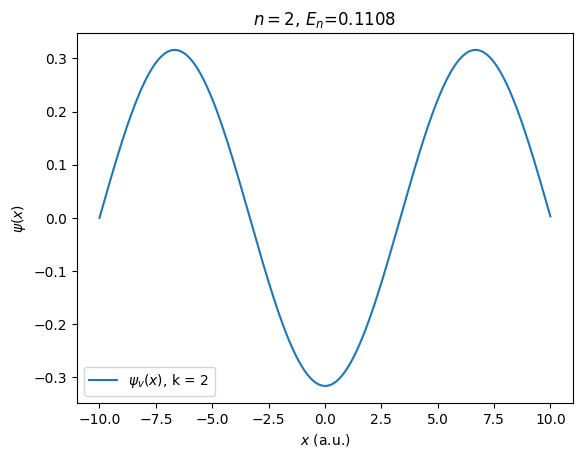

In [37]:
#Energy Levels
E = - w/(2.0*h**2)
for k in range(0,5):
  print("n=",k,", E(numeric)=%.4f" %E[k])

#Init Wavefunction (empty list with npoints elements)
psi = [None]*npoints

#Calculation of normalised Wave Functions
for k in range(0,len(w)):
	psi[k] = vs[:,k]
	integral = h*np.dot(psi[k],psi[k])
	psi[k] = psi[k]/integral**0.5

#v = int(input("\n Quantum Number (enter 0 for ground state):\n>"))
for v in range(0,3):
	plt.plot(x,psi[v],label=r'$\psi_v(x)$, k = ' + str(v))
	plt.title(r'$n=$'+ str(v) + r', $E_n$=' + '{:.4f}'.format(E[v]))
	plt.legend()
	plt.xlabel(r'$x$ (a.u.)')
	plt.ylabel(r'$\psi(x)$')
	plt.show()